# Opening, visualizing and analyzing data

In this document you can check the steps to look, explore and analyze the data from your experience. Make sure you have the datafiles in a subdiectory called __data__. Functions you develop should be stored in a subdirectory called __functions__.

In [1]:
#To force the plots to be embeded in the notebook
%matplotlib inline

import matplotlib.pyplot as plt #For plotting
import numpy as np #For numerical manipulation and opening text files
from scipy.optimize import curve_fit
#Set a style for the plots
plt.style.use('seaborn-talk')

## Opening the data
There are two files in the subdirectory. One is a __character separated values__ (Exp1.csv) file, the other is a saved file from a spreadsheet program, in this case, libre office (Exp1.ods). If you look at the files, they have a first row to label what the value refer to.

In [2]:
data = np.loadtxt('./data/Exp1.csv', delimiter=',', skiprows=1)

In [3]:
data.shape

(9, 4)

It looks like the data was successfully opened. The next step is to plot it. Alternatively, for ease of use, you can do:

In [4]:
X = data[:,0]
Y = data[:,1]
EX = data[:,2]
EY = data[:,3]

## Plotting the data
The order in the data file was (X, Y, EX, EY). Notice that we have 4 columns.

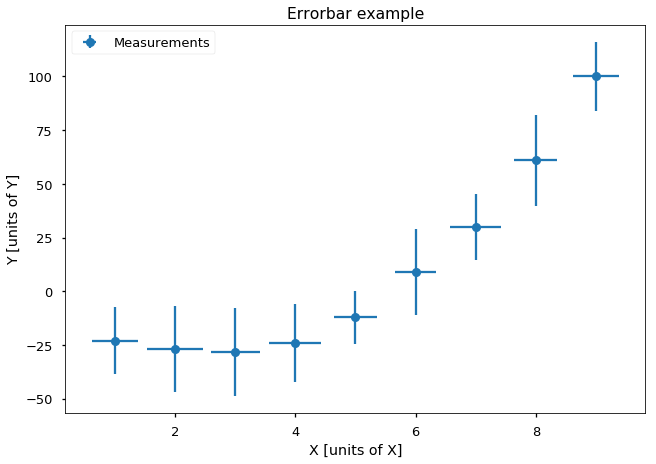

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.errorbar(X, Y, xerr=EX, yerr=EY, fmt='o', label='Measurements')

ax.set_title('Errorbar example')

ax.set_ylabel('Y [units of Y]')
ax.set_xlabel('X [units of X]')

#Set the legend out of the way
ax.legend(loc='upper left')

Always use a 'fmt' option in the plot.

## Fitting the data to a model

In this example we know the phenomena we are studying has a quadratic dependence on X. First we will define a model function for the fit, then we will fit the function to the experimental data and check how good it is.

In [6]:
def fit_function(x, a, b, c):
    return a*x**2 + b*x +c

In [7]:
popt, pcov = curve_fit(fit_function, X, Y, sigma=EY)

Check what parameters for a, b and c we get:

In [8]:
print(popt)

[  3.13130708 -16.17229786  -8.94786819]


Check how the parameters relate to each other:

In [9]:
print(pcov)

[[ 0.00580546 -0.05756564  0.10505186]
 [-0.05756564  0.60618006 -1.22020587]
 [ 0.10505186 -1.22020587  3.03119719]]


Calculate the errors for our fit parameters. These are simply the square root of the diagonal of the matrix.

In [10]:
perr = np.sqrt(np.diag(pcov))
print(perr)

[ 0.07619355  0.77857566  1.74103337]


Calculate the __$R^2$__ parameter, which is defined in one of our auxilliary functions.

In [13]:
from functions import R2calc
R2 = R2calc(Y, fit_function(X, *popt))
print R2

0.999107230363


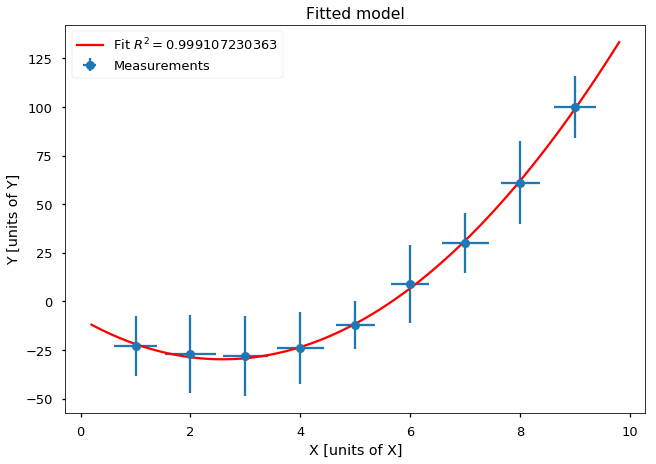

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.set_title('Fitted model')

ax.errorbar(X, Y, xerr=EX, yerr=EY, fmt='o', label='Measurements')

#Make an array of more points so we can check the wellness of our model and a little beyond,
#  for prediction capabilities
#10% extension
extension = (max(X)-min(X))*0.1
newX = np.linspace(min(X)-extension, max(X)+extension, endpoint=True, num=100)
ax.plot(newX, fit_function(newX, *popt), color='r', label='Fit $R^2=$'+str(R2))

ax.set_ylabel('Y [units of Y]')
ax.set_xlabel('X [units of X]')
ax.legend(loc='upper left')